In [6]:
import pandas as pd

# titanic csv 파일 로드
titanic = pd.read_csv('D:/GIthub/datasets/titanic_train.csv')

# 파일 로드 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 불필요 컬럼 PassengerId, Name, SibSp, Parch, Ticket, Fare, Cabin 제거
titanic.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 
                        'Ticket', 'Fare', 'Cabin'], 
                        inplace = True)
# 불필요 컬럼 제거 확인
titanic.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [9]:
# 결측치 확인
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [10]:
# 결측치가 포함된 'Age', 'Embarked' 값 대체
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked'] = titanic['Embarked'].fillna('S')

# 결측치 대체 확인
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [12]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 9.8 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 7.7 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
# 문자열 포함된 'Sex', 'Embarked' 레이블인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# fit 및 transform
titanic["Sex"] = encoder.fit_transform(titanic["Sex"])
titanic["Embarked"] = encoder.fit_transform(titanic["Embarked"])

# 인코딩 확인
titanic.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2


In [15]:
pip install seaborn

     -------------------------------------- 292.8/292.8 KB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

feature들의 평균 값
Survived    3.987333e-17
Pclass     -8.772133e-17
Sex        -1.156327e-16
Age         2.232906e-16
Embarked   -4.984166e-17
dtype: float64

feature 들의 분산 값
Survived    1.001124
Pclass      1.001124
Sex         1.001124
Age         1.001124
Embarked    1.001124
dtype: float64


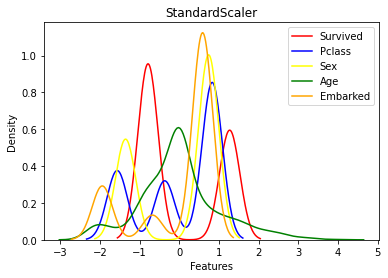

In [17]:
# StandardScaler
sscaler = StandardScaler()

titanic_scaled = sscaler.fit_transform(titanic)

titanic_df_scaled = pd.DataFrame(data= titanic_scaled, columns=titanic.columns)

print('feature들의 평균 값')
print(titanic_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(titanic_df_scaled.var())

fig = plt.plot(figsize=(20,5))

sns.kdeplot(titanic_df_scaled['Survived'], color='red')
sns.kdeplot(titanic_df_scaled['Pclass'], color='blue')
sns.kdeplot(titanic_df_scaled['Sex'], color='yellow')
sns.kdeplot(titanic_df_scaled['Age'], color='green')
sns.kdeplot(titanic_df_scaled['Embarked'], color='orange')

plt.title('StandardScaler')

plt.xlabel('Features')
plt.legend(['Survived','Pclass', 'Sex', 'Age', 'Embarked'])
plt.show()

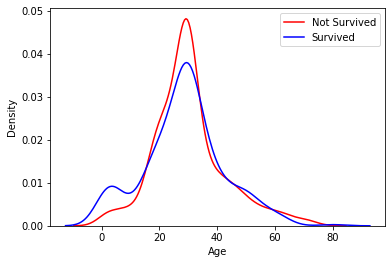

In [18]:
fig = plt.plot(figsize=(20,5))

sns.kdeplot(titanic['Age'][(titanic['Survived'] == 0)], color='red')
sns.kdeplot(titanic['Age'][(titanic['Survived'] == 1)], color='blue')
plt.xlabel('Age')
plt.legend(['Not Survived', 'Survived'])
plt.show()

feature들의 최소 값
Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Embarked    0.0
dtype: float64

feature 들의 최대 값
Survived    1.0
Pclass      1.0
Sex         1.0
Age         1.0
Embarked    1.0
dtype: float64


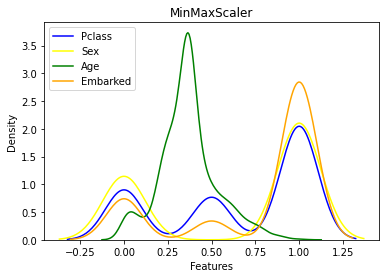

In [19]:
# MinMaxScaler
mmcaler = MinMaxScaler()

titanic_scaled = mmcaler.fit_transform(titanic)

titanic_df_scaled = pd.DataFrame(data= titanic_scaled, columns=titanic.columns)

print('feature들의 최소 값')
print(titanic_df_scaled.min())
print('\nfeature 들의 최대 값')
print(titanic_df_scaled.max())

fig = plt.plot(figsize=(20,5))

sns.kdeplot(titanic_df_scaled['Pclass'], color='blue')
sns.kdeplot(titanic_df_scaled['Sex'], color='yellow')
sns.kdeplot(titanic_df_scaled['Age'], color='green')
sns.kdeplot(titanic_df_scaled['Embarked'], color='orange')

plt.title('MinMaxScaler')
plt.xlabel('Features')
plt.legend(['Pclass', 'Sex', 'Age', 'Embarked'])
plt.show()

feature들의 중간 값
Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Embarked    0.0
dtype: float64

feature 들의 사분위 값
0.8230090497737554

feature들의 평균 값
Survived    3.838384e-01
Pclass     -6.913580e-01
Sex        -3.524130e-01
Age         2.153160e-16
Embarked   -4.635241e-01
dtype: float64

feature 들의 분산 값
Survived    0.236772
Pclass      0.699015
Sex         0.228475
Age         1.000310
Embarked    0.626477
dtype: float64


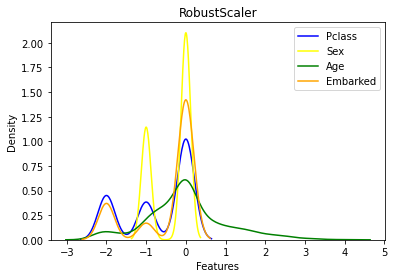

In [20]:
# RobustScaler
rbscaler = RobustScaler()

titanic_scaled = rbscaler.fit_transform(titanic)

titanic_df_scaled = pd.DataFrame(data= titanic_scaled, columns=titanic.columns)

q3, q1 = np.percentile(titanic_df_scaled, [72, 25])
iqr = q3 - q1

print('feature들의 중간 값')
print(titanic_df_scaled.median())
print('\nfeature 들의 사분위 값')
print(iqr)

print('\nfeature들의 평균 값')
print(titanic_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(titanic_df_scaled.var())

fig = plt.plot(figsize=(20,5))

sns.kdeplot(titanic_df_scaled['Pclass'], color='blue')
sns.kdeplot(titanic_df_scaled['Sex'], color='yellow')
sns.kdeplot(titanic_df_scaled['Age'], color='green')
sns.kdeplot(titanic_df_scaled['Embarked'], color='orange')

plt.title('RobustScaler')
plt.xlabel('Features')
plt.legend(['Pclass', 'Sex', 'Age', 'Embarked'])
plt.show()

### DecisionTree Visualization

In [21]:
# data와 target 분리

data = titanic[['Pclass', 'Sex', 'Age', 'Embarked']]
target = titanic['Survived']

In [22]:
# 데이터 분리

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

sscaler = StandardScaler()

sscaler.fit(train_input)
train_scaled = sscaler.fit_transform(train_input)
test_scaled = sscaler.fit_transform(test_input)


In [24]:
# 훈련 데이터 학습
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

# print(dt.score(train_scaled, train_target))
# print(dt.score(test_scaled, test_target))

DecisionTreeClassifier(random_state=42)

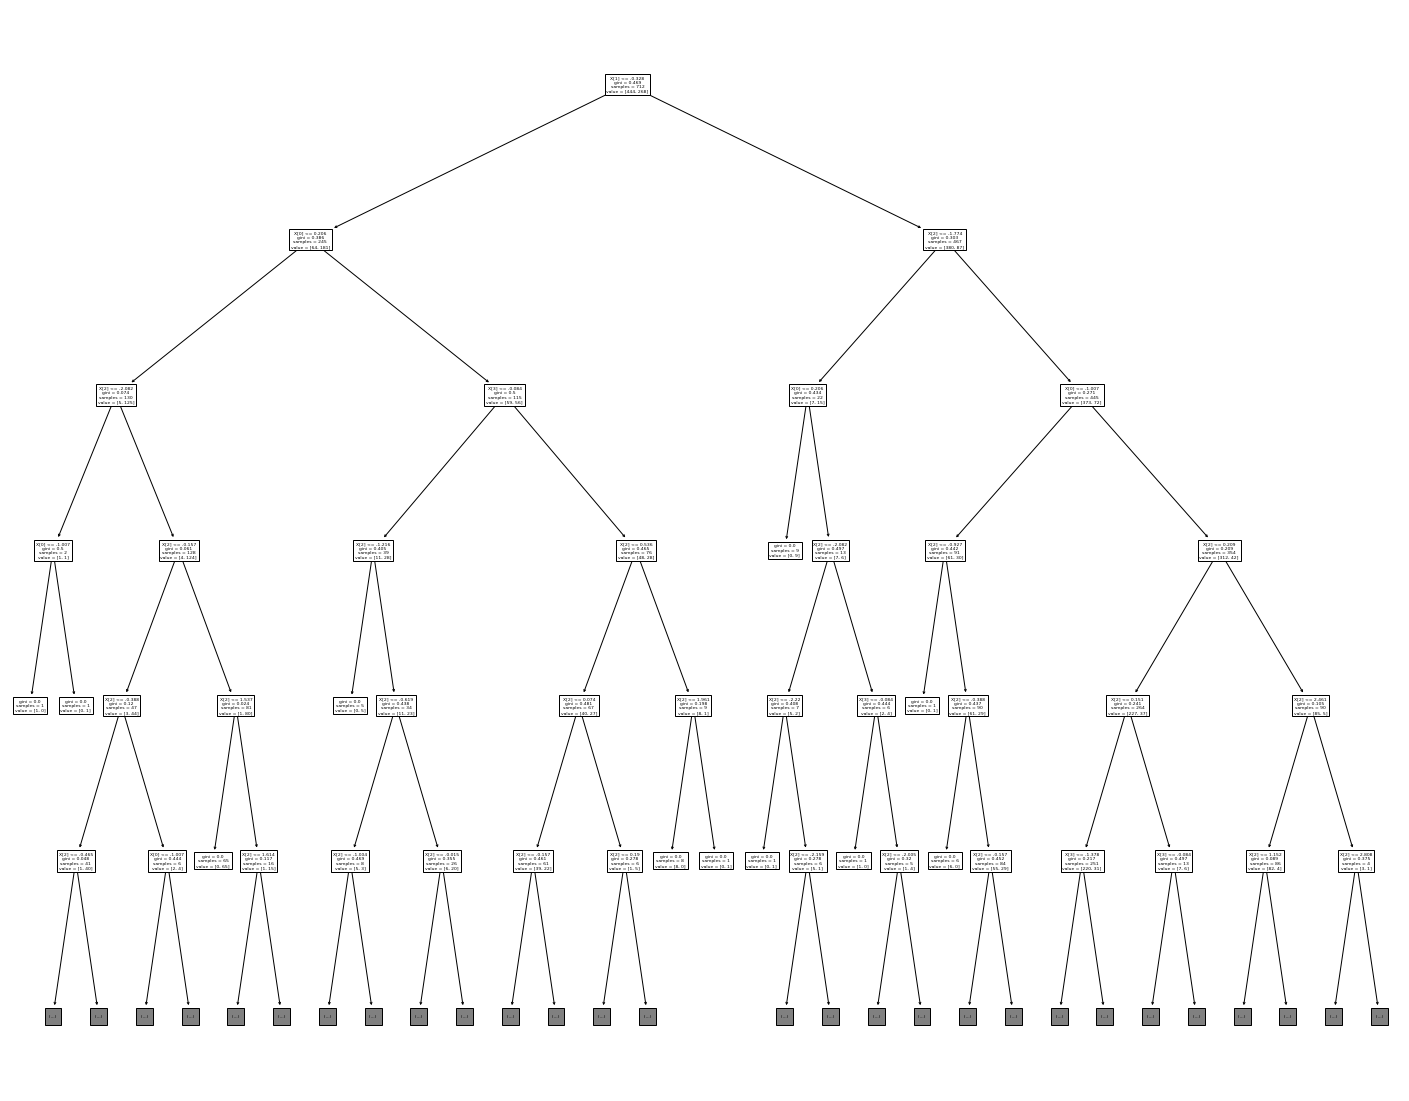

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 20))
plot_tree(dt, max_depth=5)
plt.show()

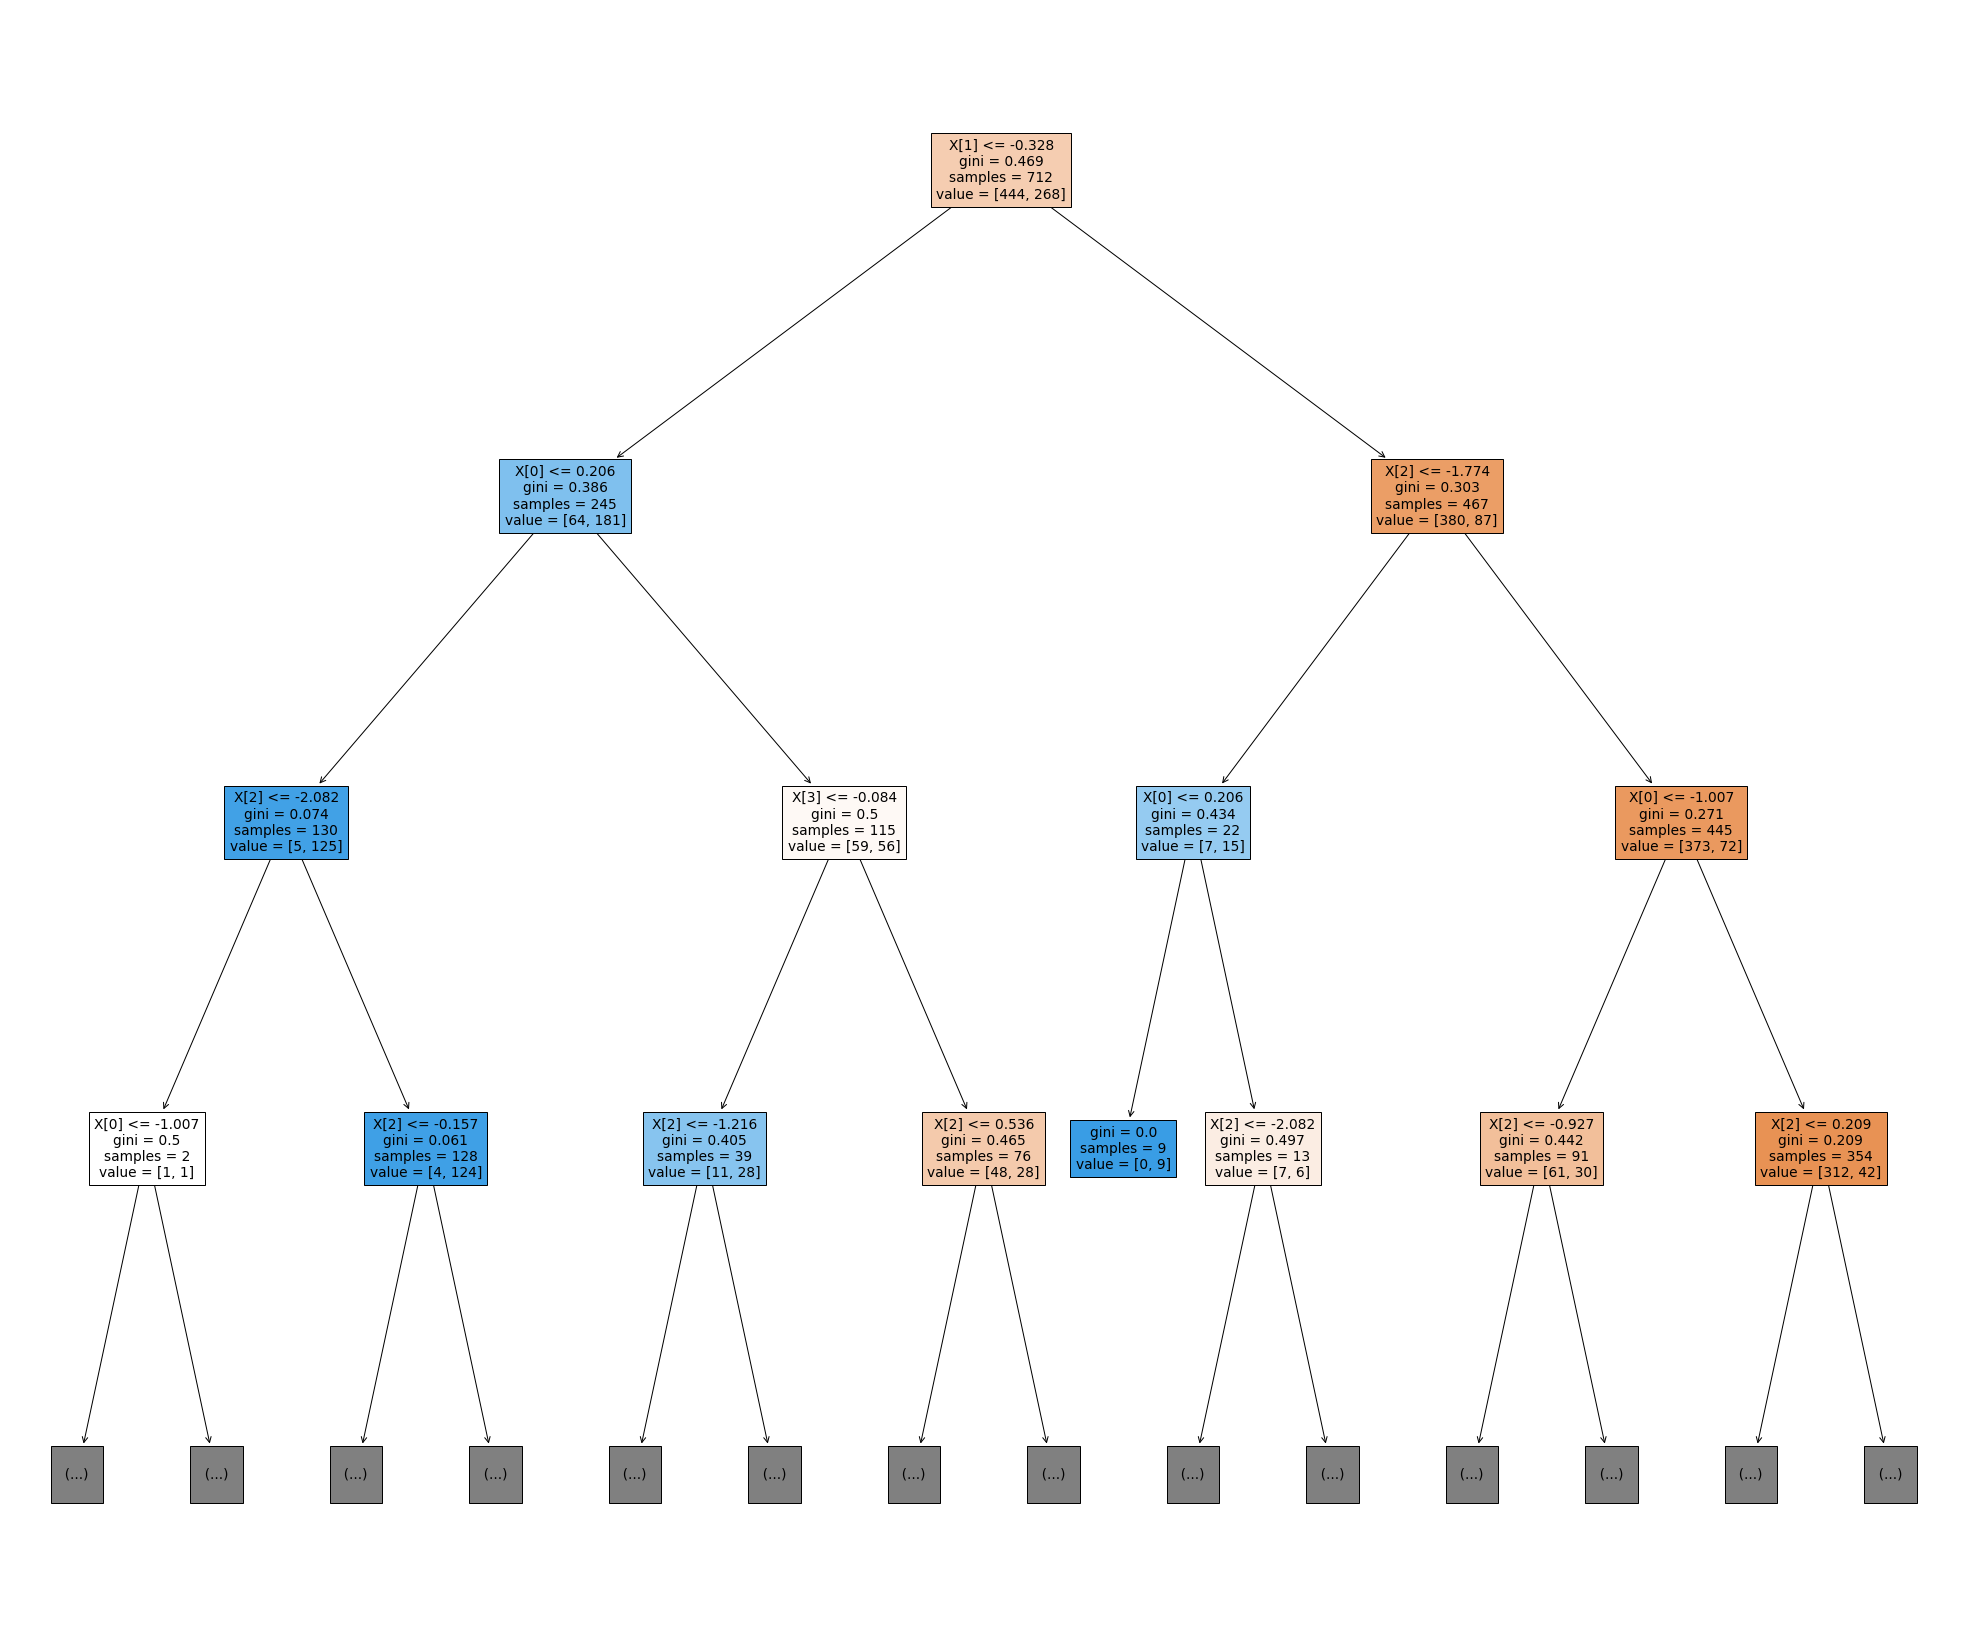

In [26]:
plt.figure(figsize=(35,30))
plot_tree(dt,max_depth=3, filled=True)
plt.show()

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

mmscaler = StandardScaler()

mmscaler.fit(train_input)
train_scaled = sscaler.fit_transform(train_input)
test_scaled = sscaler.fit_transform(test_input)

In [28]:
# data와 target 분리

data = titanic[['Pclass', 'Sex', 'Age', 'Embarked']]
target = titanic['Survived']

In [29]:
# 데이터 분리

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [30]:
# 훈련 데이터 학습

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

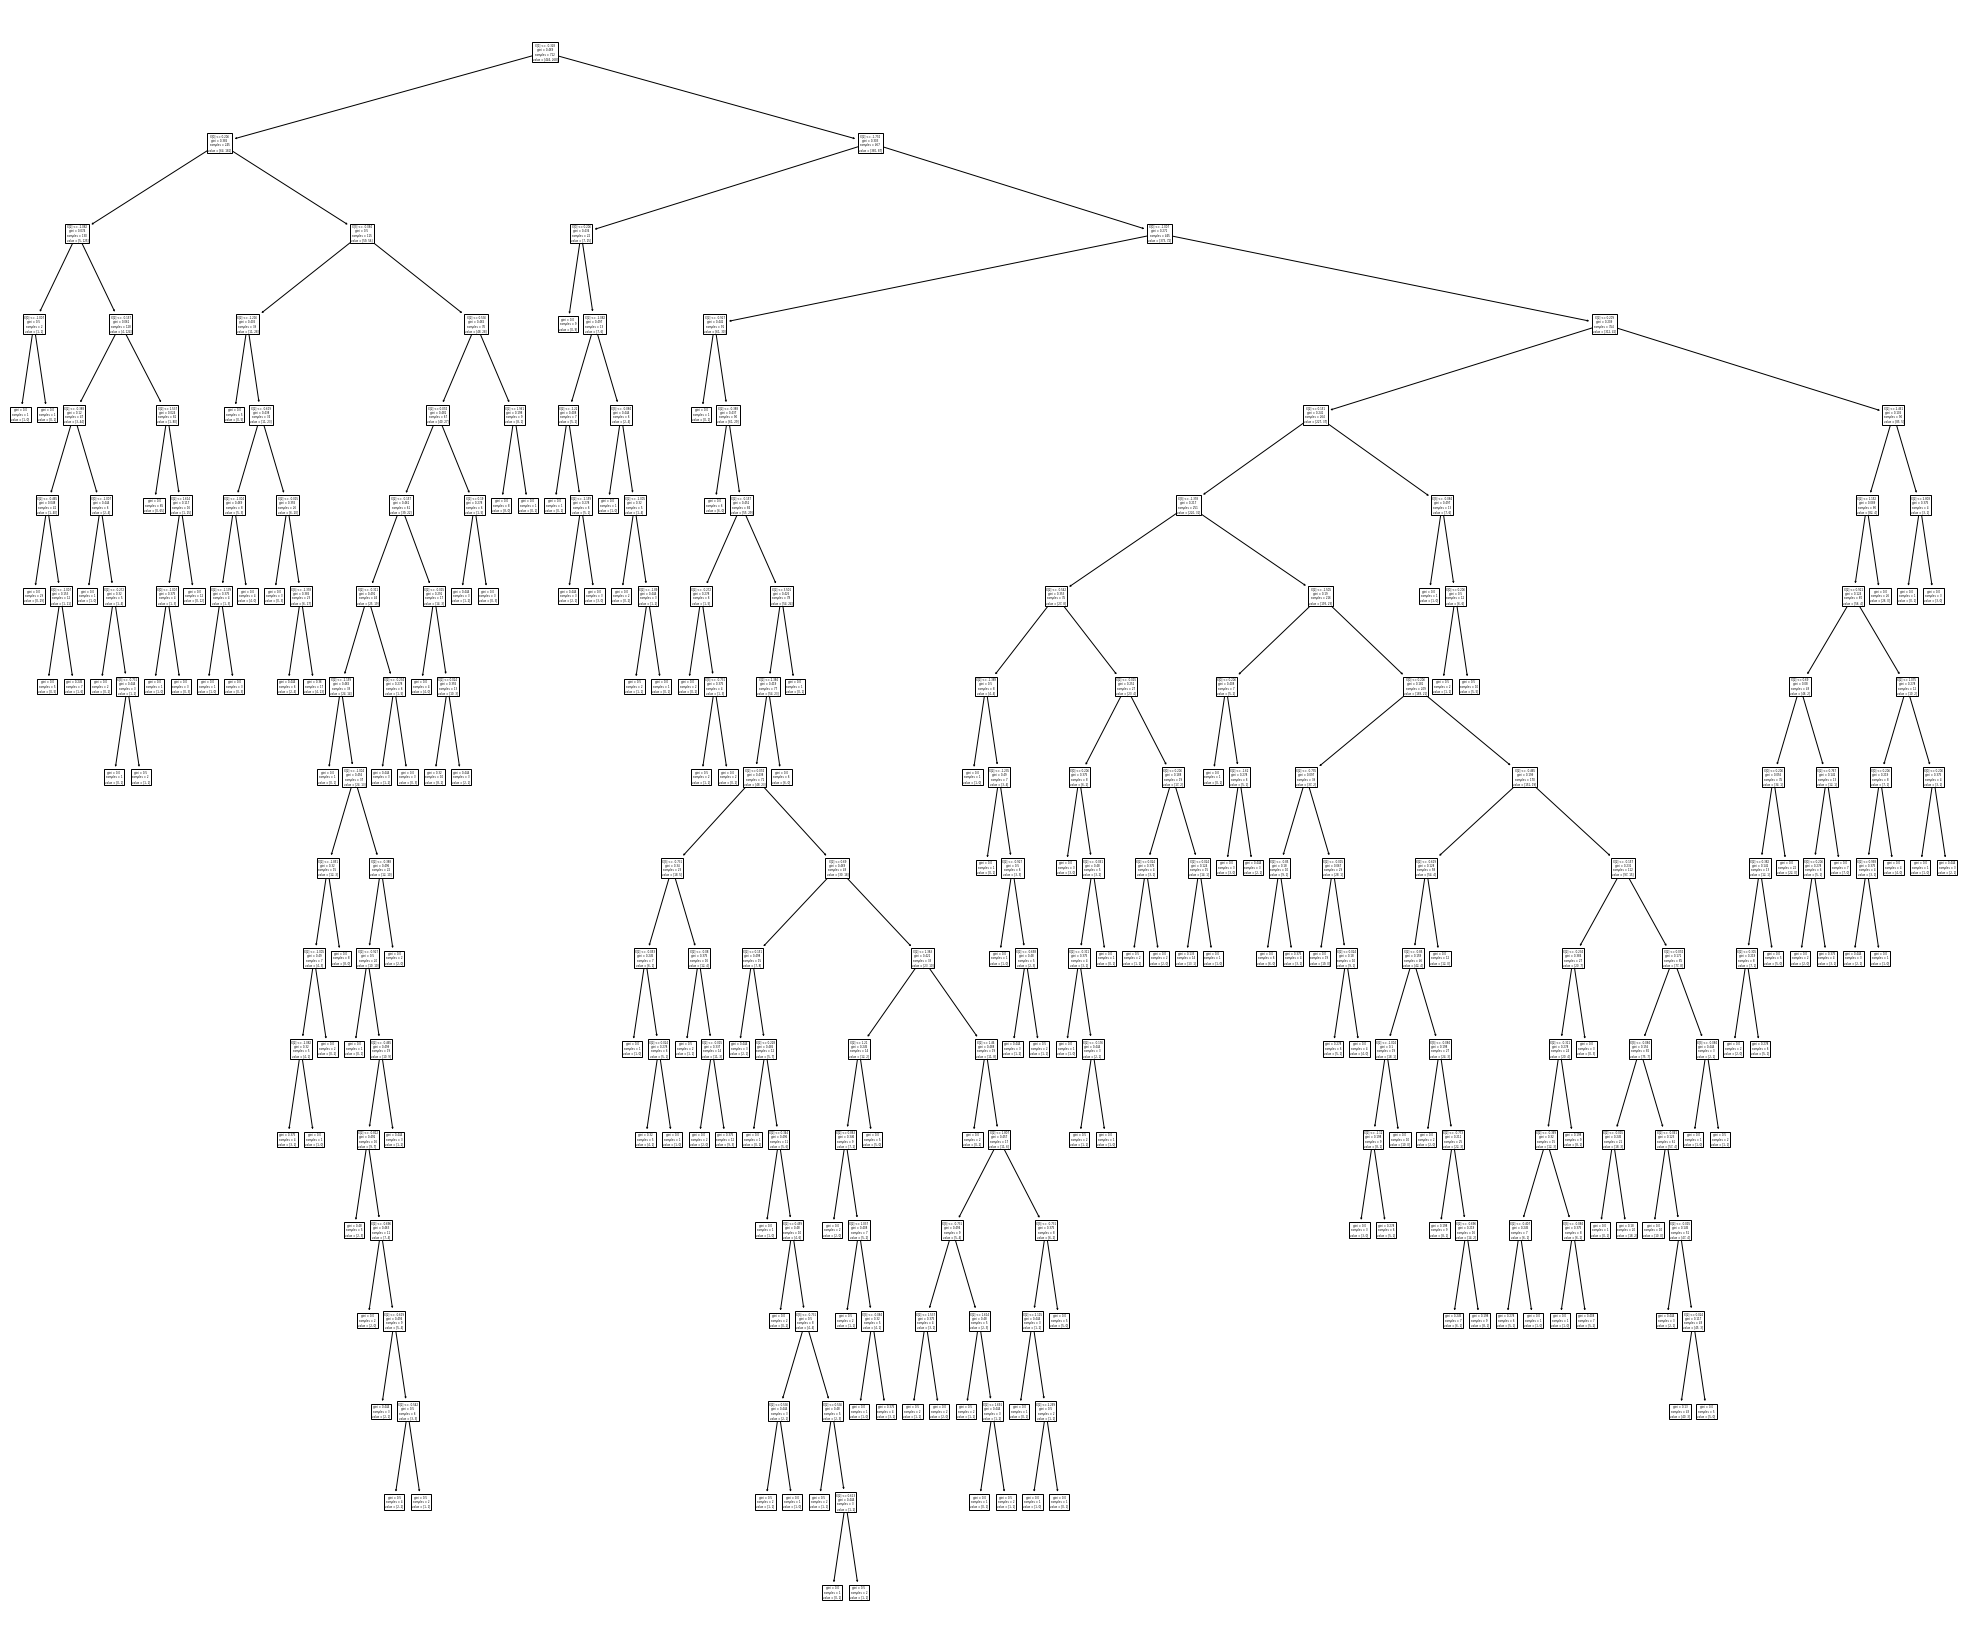

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(35, 30))
plot_tree(dt)
plt.show()

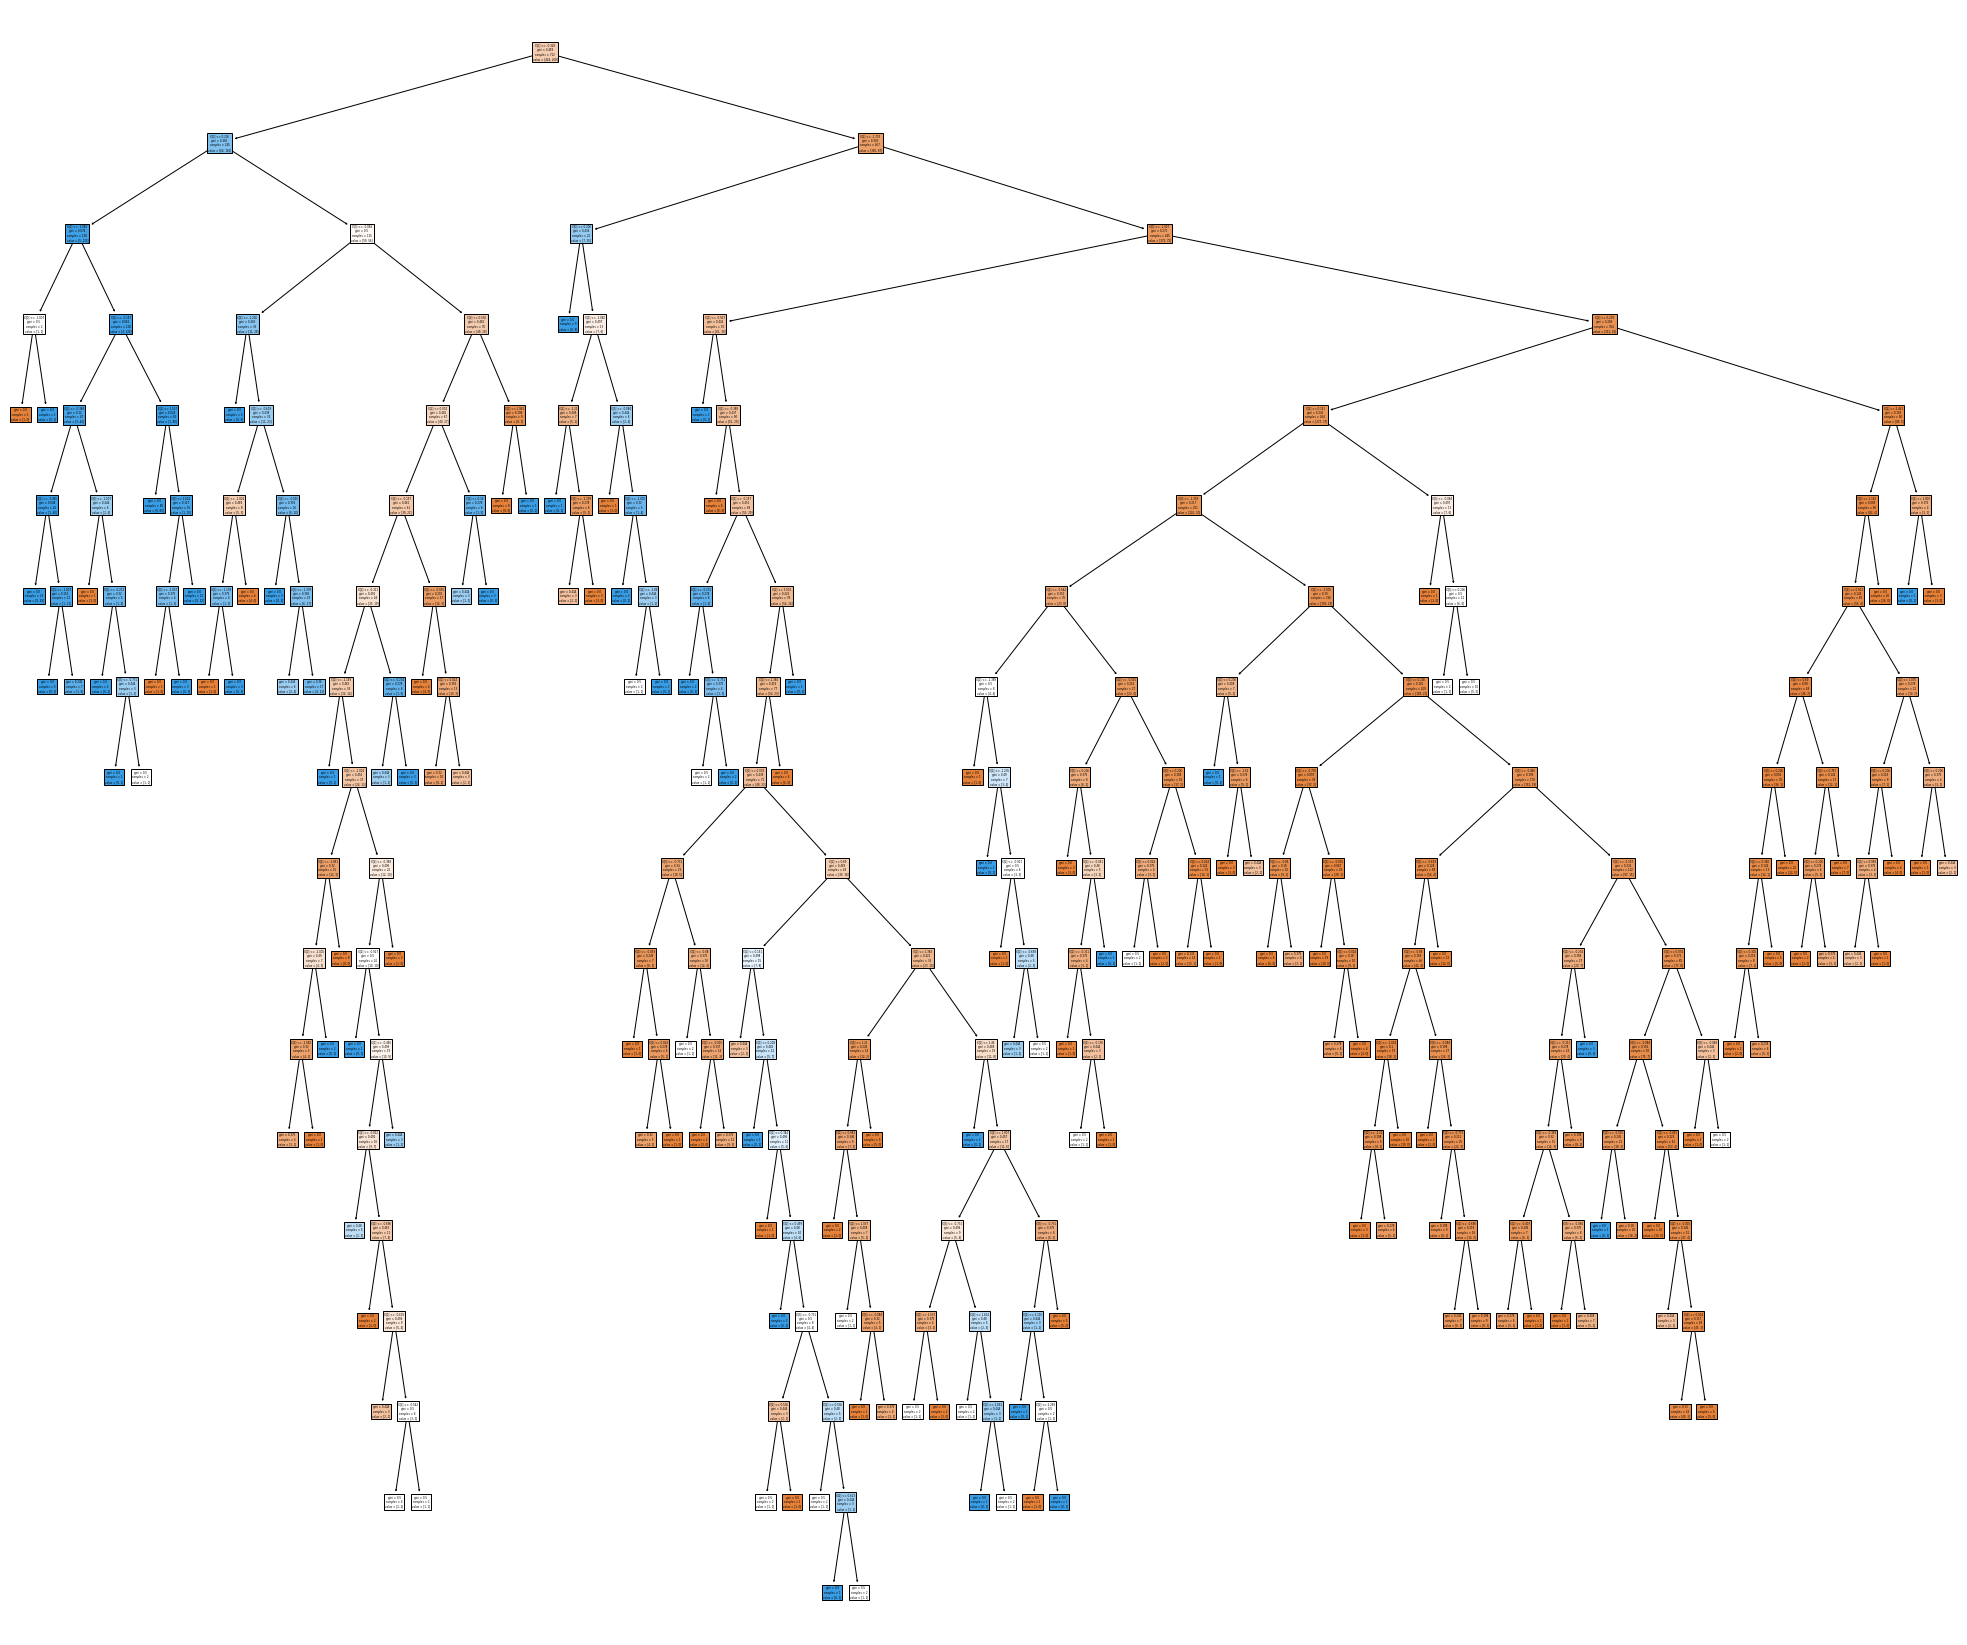

In [32]:
plt.figure(figsize=(35,30))
plot_tree(dt, filled=True)
plt.show()

<AxesSubplot:>

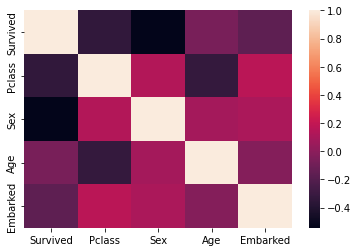

In [33]:
# 히트맵

sns.heatmap(titanic.corr())